In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/spam.csv",encoding='latin-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# renaming the column
df.rename(columns={'v1':'message_type','v2':'message'},inplace=True)
df.head(10)

,message_type,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   message_type  5573 non-null   object
 1   message       5573 non-null   object
 2   Unnamed: 2    50 non-null     object
 3   Unnamed: 3    12 non-null     object
 4   Unnamed: 4    6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# remove column
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df.head(5)

,message_type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# assigning 0 and 1 for message type ham and spam
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['message_type_no']= encoder.fit_transform(df['message_type'])
df.head(5)


,message_type,message,message_type_no
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
#finding the duplicated datas, nan dagta

print(df.isnull().sum())

print("no of duplicated data =",df.duplicated().sum())


message_type       0
message            0
message_type_no    0
dtype: int64
no of duplicated data = 403


In [ ]:
# removing duplicated data and NaN data
df=df.drop_duplicates()
df=df.dropna()
df.duplicated().sum()

0

messsage type count = ham     4516
spam     654
Name: message_type, dtype: int64


([<matplotlib.patches.Wedge at 0x7ba0fa219450>,
 [Text(-1.0142737821828087, 0.4257331262382342, 'not spam'),
  Text(1.0142737423227925, -0.425733221201397, 'spam')],
 [Text(-0.5532402448269865, 0.23221806885721863, '87.35'),
  Text(0.5532402230851595, -0.23221812065530742, '12.65')])

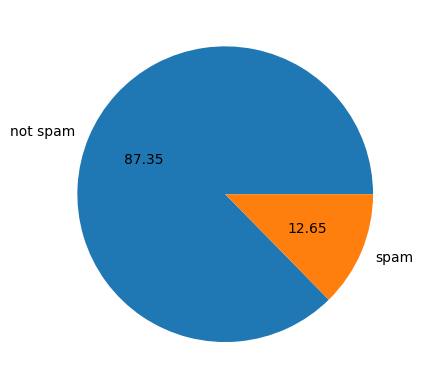

In [ ]:
# Data Visualization using piechart

import seaborn as sns
import matplotlib.pyplot as plt
print("messsage type count =",df['message_type'].value_counts())

plt.pie(df['message_type'].value_counts(),labels=['not spam','spam'],autopct='%0.2f')


In [ ]:
# counting no of words in each messages using nltk package

import nltk
nltk.download('punkt')
df['no_charaters']=df['message'].apply(len)
df.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,message_type,message,message_type_no,no_charaters
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [ ]:
#finding no of sentence

df['no_sentence']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
#counting no of words
from nltk.tokenize import word_tokenize

df['message'].apply(lambda x: nltk.word_tokenize(x))
df['no_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head(5)

,message_type,message,message_type_no,no_charaters,no_sentence,no_words
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,2,24
1,ham,Ok lar... Joking wif u oni...,0,29,2,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,2,37
3,ham,U dun say so early hor... U c already then say...,0,49,1,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,1,15


In [ ]:
#print the ham messages seperately

df[df['message_type_no']==0]

,message_type,message,message_type_no,no_charaters,no_sentence,no_words
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,2,24
1,ham,Ok lar... Joking wif u oni...,0,29,2,8
3,ham,U dun say so early hor... U c already then say...,0,49,1,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,1,15
6,ham,Even my brother is not like to speak with me. ...,0,77,2,18
...,...,...,...,...,...,...
5565,ham,Huh y lei...,0,12,1,4
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,1,9
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,2,15
5570,ham,The guy did some bitching but I acted like i'd...,0,125,1,27


In [ ]:
#describe  the spam message seperately
df[df['message_type_no']==1].describe()

,message_type_no,no_charaters,no_sentence,no_words
count,654.0,654.000000,654.000000,654.000000
mean,1.0,137.759939,2.967890,27.637615
std,0.0,30.301378,1.489281,7.045152
min,1.0,13.000000,1.000000,2.000000
25%,1.0,132.000000,2.000000,25.000000
50%,1.0,149.000000,3.000000,29.000000
75%,1.0,157.000000,4.000000,32.000000
max,1.0,224.000000,9.000000,46.000000


# ***Data Preprocessing***


***

In [ ]:
# to lower the words
def text_transform(message):
  message=message.lower()
  message=nltk.word_tokenize(message)
  y=[]
  for i in message:
    if i.isalnum():
      y.append(i)
  message=y[:]
  y.clear()

  # remove stopwords and punctuation
  for i in message:

    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  message=y[:]
  y.clear()

  # stemming function - reducing the words t3o its root
  for i in message :
    y.append(ps.stem(i))
  return y

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
df['transformed_message']=df['message'].apply(text_transform)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head(5)

,message_type,message,message_type_no,no_charaters,no_sentence,no_words,transformed_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,2,24,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,0,29,2,8,"[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,2,37,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,0,49,1,13,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,1,15,"[nah, think, goe, usf, live, around, though]"


In [ ]:
#display the transformed message of ham

df['transformed_message'] = df['transformed_message'].astype(str)
df[df['message_type_no']==0]['transformed_message'].head(5)

0    ['go', 'jurong', 'point', 'crazi', 'avail', 'b...
1             ['ok', 'lar', 'joke', 'wif', 'u', 'oni']
3    ['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', ...
4    ['nah', 'think', 'goe', 'usf', 'live', 'around...
6    ['even', 'brother', 'like', 'speak', 'treat', ...
Name: transformed_message, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5170 entries, 0 to 5572
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   message_type         5170 non-null   object
 1   message              5170 non-null   object
 2   message_type_no      5170 non-null   int64 
 3   no_charaters         5170 non-null   int64 
 4   no_sentence          5170 non-null   int64 
 5   no_words             5170 non-null   int64 
 6   transformed_message  5170 non-null   object
dtypes: int64(4), object(3)
memory usage: 323.1+ KB


# ***Word Cloud***

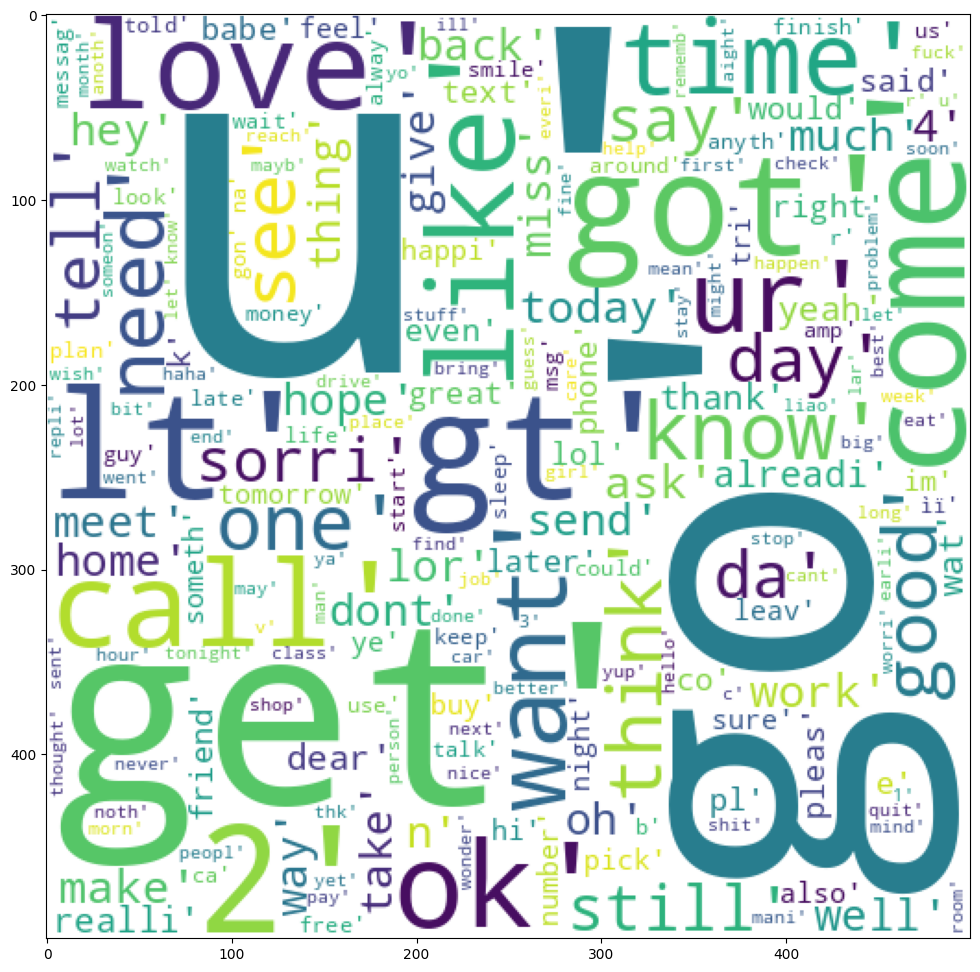

In [ ]:
# spam wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['message_type_no']==0]['transformed_message'].str.cat(sep=""))
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)


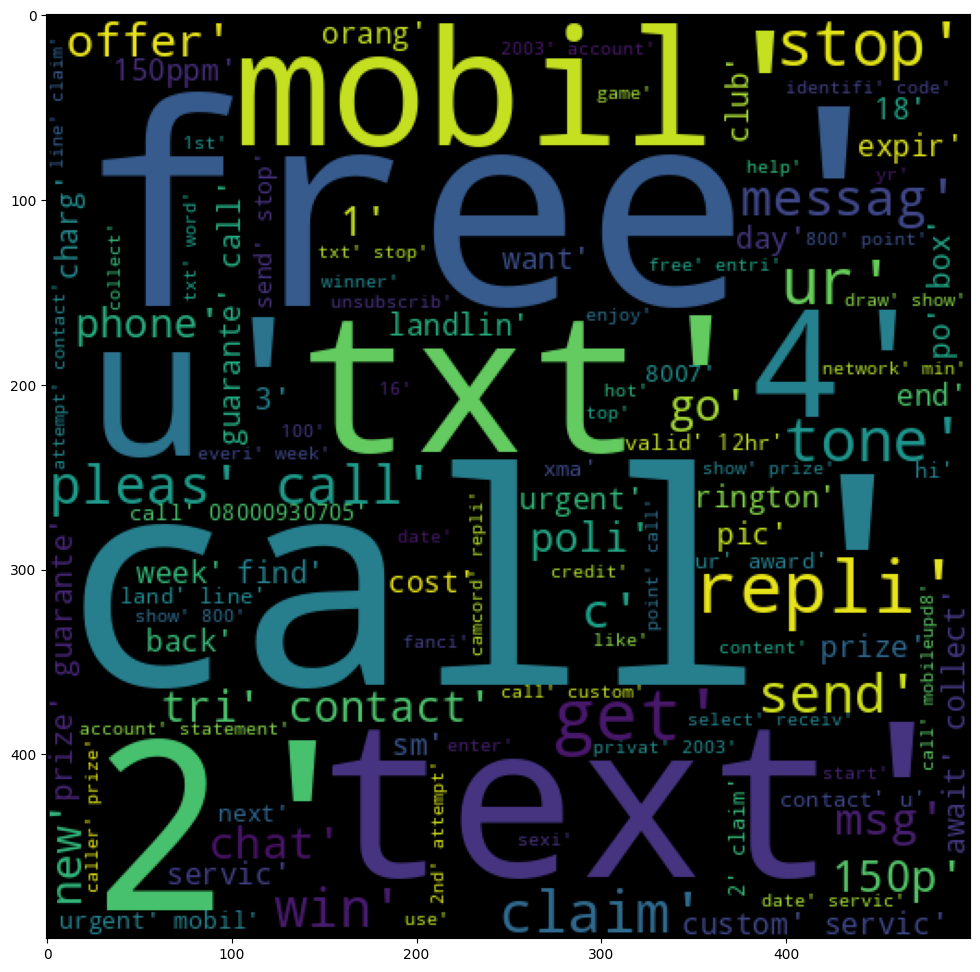

In [ ]:
# ham wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')
ham_wc=wc.generate(df[df['message_type_no']==1]['transformed_message'].str.cat(sep=""))
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)


**Spam Detector: A Naive Bayes Approach to Email Filtering in Python**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000)

In [ ]:
X=tfidf.fit_transform(df['transformed_message']).toarray()
y=df['message_type_no'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [ ]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

Accuracy score of Gaussian NB is:  0.8539651837524178
Confusion Matrix of Guassian NB is:
 [[772 128]
 [ 23 111]]
Precision score of the Gaussian NB is 0.9054125471705747


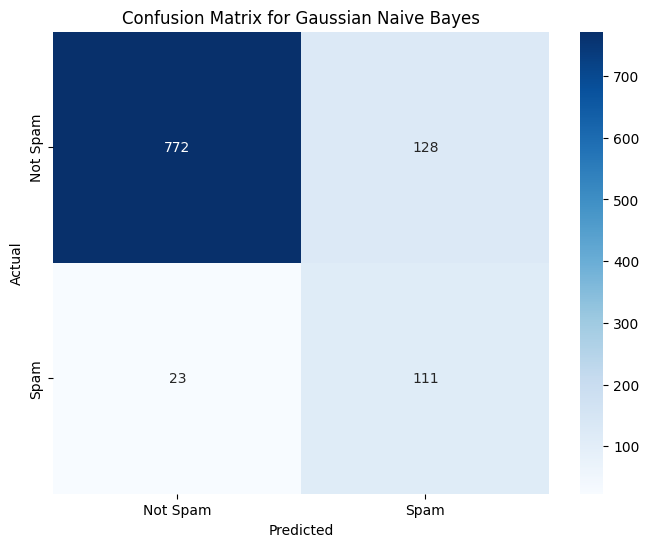

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is:\n',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1,average='weighted'))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred1)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy score of Multinomial NB is:  0.971953578336557
Confusion Matrix of Multinomial NB is:
 [[900   0]
 [ 29 105]]
Precision score of the Multinomial NB is 0.9728290855790113


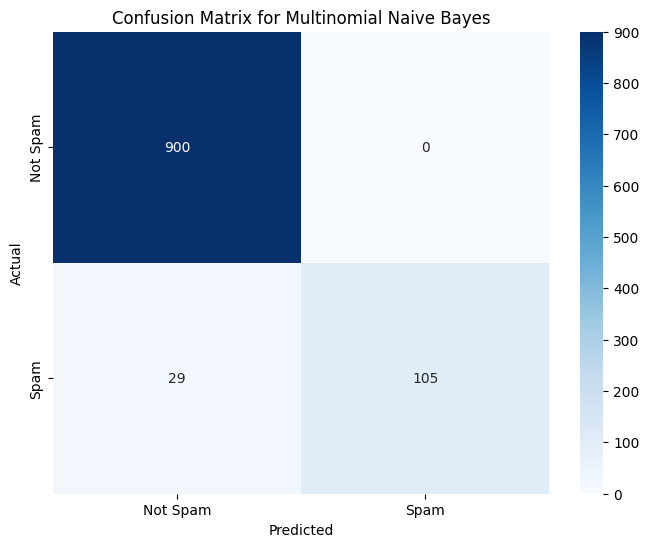

In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is:\n',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2,average='weighted'))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred2)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy score of Bernoulli NB is:  0.9825918762088974
Confusion Matrix of Bernoulli NB is:
 [[899   1]
 [ 17 117]]
Precision score of the Bernoulli NB is 0.982747920707062


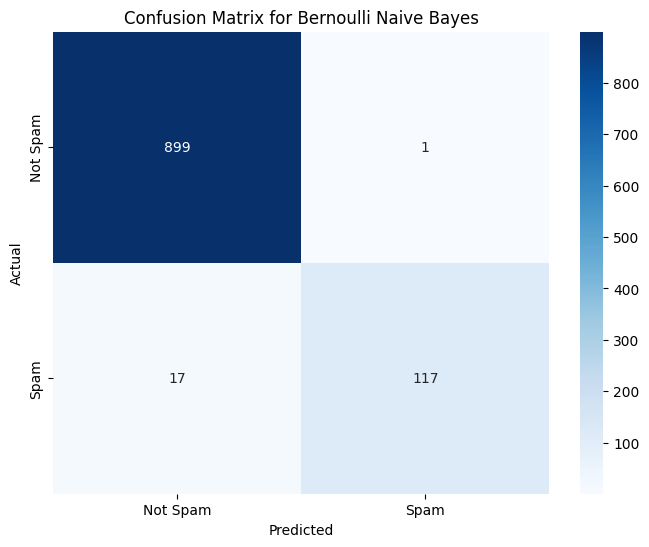

In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is:\n',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3,average='weighted'))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred3)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for Bernoulli Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
clfs = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

accuracy_scores = []
precision_scores = []

# Train, predict, and evaluate each classifier
# Calculate and print the performance metrics for each classifier
for clf_name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Specify the positive class label for precision_score
    precision = precision_score(y_test, y_pred, pos_label=1)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})
# Additional DataFrames for different feature sets or scaling approaches
temp_df_3000 = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores
}).sort_values('Precision_max_ft_3000', ascending=False)

temp_df_scaling = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy_scaling': accuracy_scores,
    'Precision_scaling': precision_scores
}).sort_values('Precision_scaling', ascending=False)

temp_df_num_chars = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy_num_chars': accuracy_scores,
    'Precision_num_chars': precision_scores
}).sort_values('Precision_num_chars', ascending=False)

# Merge the DataFrames
new_df = performance_df.merge(temp_df_3000, on='Algorithm')
new_df_scaled = new_df.merge(temp_df_scaling, on='Algorithm')
final_df = new_df_scaled.merge(temp_df_num_chars, on='Algorithm')

In [ ]:
# Display the final DataFrame
display(final_df)

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,GaussianNB,0.853965,0.464435,0.853965,0.464435,0.853965,0.464435,0.853965,0.464435
1,MultinomialNB,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,BernoulliNB,0.982592,0.991525,0.982592,0.991525,0.982592,0.991525,0.982592,0.991525


# ***Testing***

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

input_sms = "U dun say so early hor... U c already then say..."

    # 1. preprocess
transformed_sms = transform_text(input_sms)
# 2. vectorize
vector_input = tfidf.transform([transformed_sms])
# 3. predict
model=MultinomialNB()
model.fit(X_train,y_train)
result = model.predict(vector_input)[0]

# 4. Display
if result == 1:
  print("Spam")
else:
  print("Not Spam")

Not Spam
